<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

In [2]:
pip install --upgrade matplotlib

Note: you may need to restart the kernel to use updated packages.


Load the dataset into a dataframe.


In [3]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
print(sns.__version__)

0.9.0


In [5]:
print(df.shape)
df.columns

(11398, 85)


Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

Plot the distribution curve for the column `ConvertedComp`.


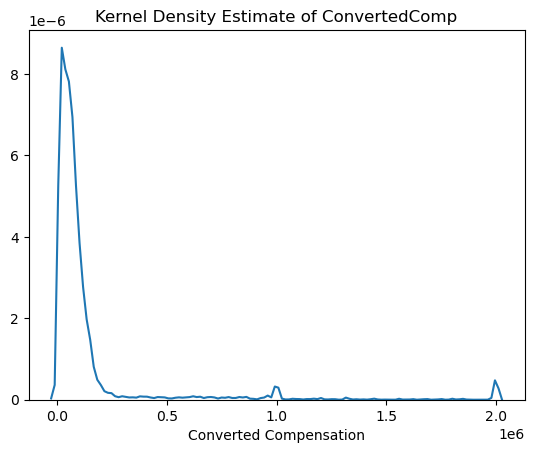

In [6]:
sns.distplot(df['ConvertedComp'].dropna(), hist=False, kde=True)
plt.title('Kernel Density Estimate of ConvertedComp')
plt.xlabel('Converted Compensation')
plt.show()

Plot the histogram for the column `ConvertedComp`.


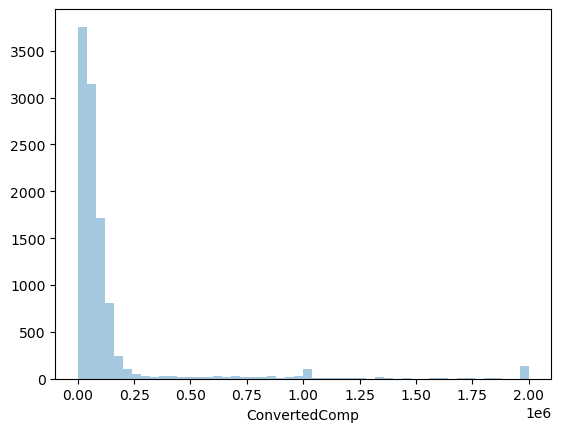

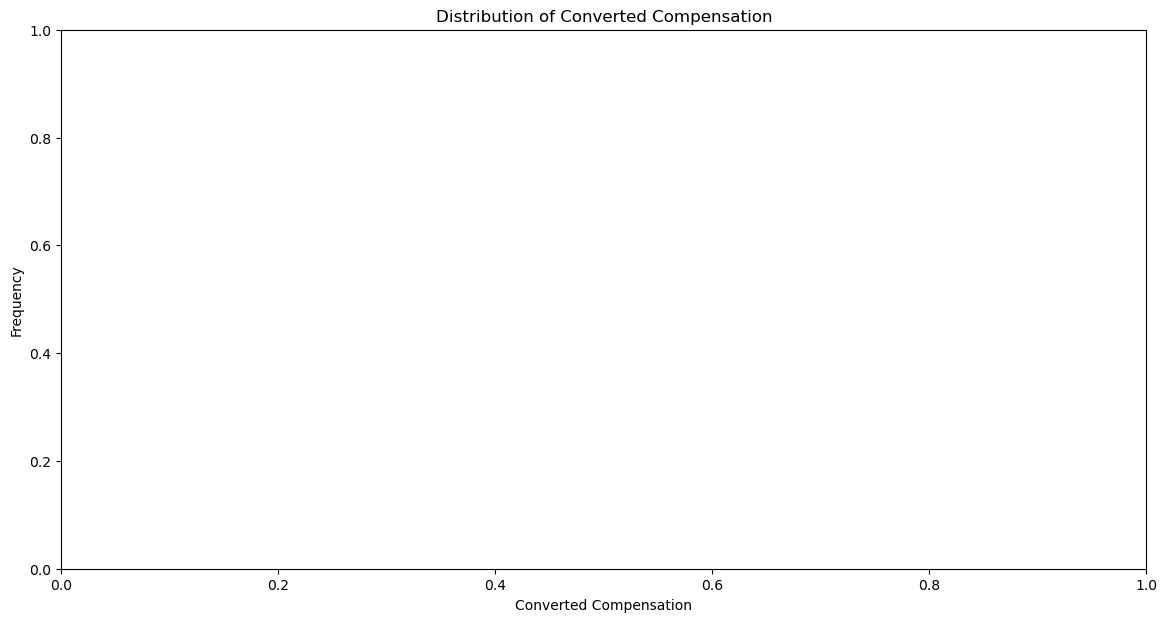

In [7]:
# Plotting the histogram
sns.distplot(df['ConvertedComp'].dropna(), bins=50, kde=False)

# Adjusting the size of the plot
plt.figure(figsize=(14, 7))  # width: 14 inches, height: 7 inches

plt.title('Distribution of Converted Compensation')
plt.xlabel('Converted Compensation')
plt.ylabel('Frequency')
plt.show()

What is the median of the column `ConvertedComp`?


In [8]:
df['ConvertedComp'].describe()

count    1.058200e+04
mean     1.315967e+05
std      2.947865e+05
min      0.000000e+00
25%      2.686800e+04
50%      5.774500e+04
75%      1.000000e+05
max      2.000000e+06
Name: ConvertedComp, dtype: float64

How many responders identified themselves only as a **Man**?


In [9]:
df['Gender'].value_counts()

Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [10]:
df['ConvertedComp'][(df.Gender == 'Woman')].describe()

count    6.790000e+02
mean     1.011031e+05
std      2.202510e+05
min      0.000000e+00
25%      2.654650e+04
50%      5.770800e+04
75%      9.500000e+04
max      2.000000e+06
Name: ConvertedComp, dtype: float64

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [11]:
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


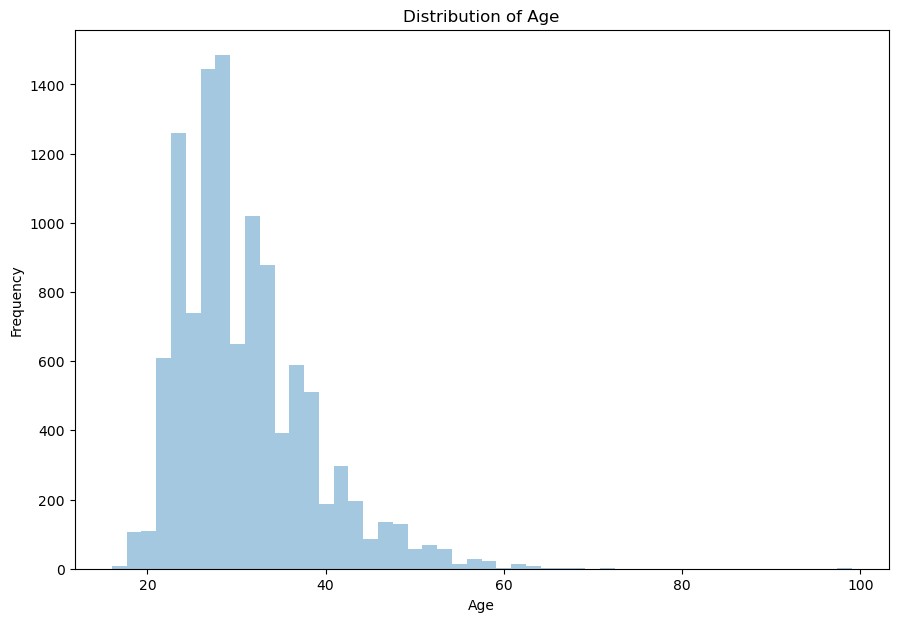

In [12]:
# Adjusting the size of the plot
plt.figure(figsize=(10.5, 7))  # aspect ratio 1.5:1 (aspect = width / height)
# Plotting the distribution for 'Age'
sns.distplot(df['Age'].dropna(), kde=False)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


<AxesSubplot:>

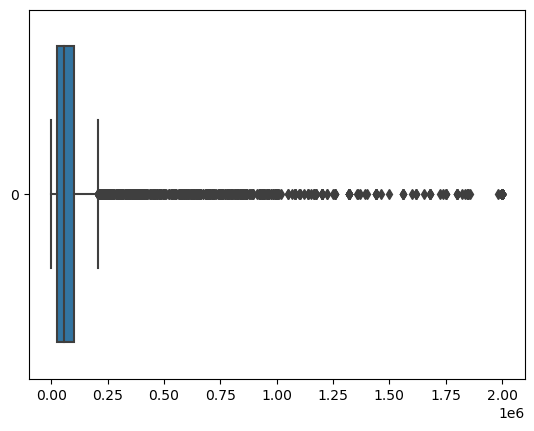

In [13]:
sns.boxplot(data=df['ConvertedComp'], orient = 'h')

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [14]:
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
print('Q1', Q1)
print('Q3', Q3)
IQR = Q3-Q1
print('IQR',IQR)

Q1 26868.0
Q3 100000.0
IQR 73132.0


Find out the upper and lower bounds.


In [16]:
upper_bound = Q3 + IQR*1.5
print('Upper bound:', upper_bound)
lower_bound = Q1 - IQR*1.5
print('Lower bound:', lower_bound)

Upper bound: 209698.0
Lower bound: -82830.0


Identify how many outliers are there in the `ConvertedComp` column.


In [17]:
num_outliers = 0
for conv_comp in df['ConvertedComp']:
    if (conv_comp < lower_bound) or (conv_comp > upper_bound):
        num_outliers = num_outliers + 1
num_outliers

879

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [21]:
outlier_index = df[(df.ConvertedComp < lower_bound) | (df.ConvertedComp > upper_bound)].index
df_outlier = df.drop(outlier_index)
print(df_outlier.shape)
df_outlier.describe()

(10519, 85)


,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,10519.000000,9.710000e+03,9703.000000,10402.000000,8277.000000,10250.000000
mean,12488.961023,7.243963e+05,59883.208389,41.895813,4.809352,30.647298
std,7235.797316,7.184433e+06,43394.336755,24.301665,4.636411,7.352928
min,4.000000,0.000000e+00,0.000000,3.000000,0.000000,16.000000
25%,6257.500000,2.000000e+04,24060.000000,40.000000,2.000000,25.000000
50%,12483.000000,6.300000e+04,52704.000000,40.000000,4.000000,29.000000
75%,18789.500000,1.150000e+05,85574.500000,43.000000,5.000000,34.000000
max,25142.000000,3.900000e+08,209356.000000,1012.000000,99.000000,99.000000


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [20]:
df.corr()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.013490,0.002181,-0.015314,0.004621,0.004041
CompTotal,-0.013490,1.000000,0.001037,0.003510,0.007063,0.006970
ConvertedComp,0.002181,0.001037,1.000000,0.021143,-0.033865,0.105386
WorkWeekHrs,-0.015314,0.003510,0.021143,1.000000,0.026517,0.036518
CodeRevHrs,0.004621,0.007063,-0.033865,0.026517,1.000000,-0.020469
Age,0.004041,0.006970,0.105386,0.036518,-0.020469,1.000000
